# ABOUT:
- this notebook explores **Deep Fashion MultiModal Dataset**
- insight:
    - there are over 40k high resolution images, each assigned with tags and a description
    

In [1]:
import gzip
import json
import pandas as pd
import seaborn as sb
import re
from PIL import Image
import os

### image data
- over 40k high resolution pictures

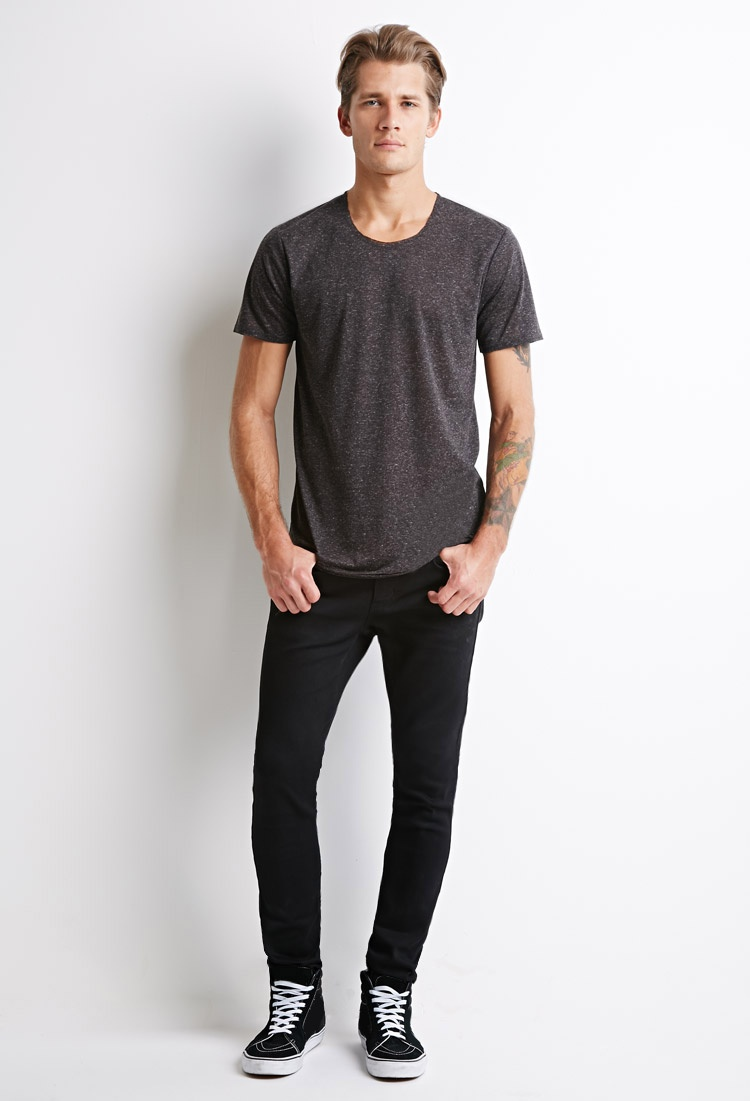

In [107]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\images\images\MEN-Denim-id_00000080-01_7_additional.jpg"
Image.open(path)

In [110]:
print("Number of Images: ",len(os.listdir(r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\images\images")))

Number of Images:  44096


### caption data
- each image has a short description

In [13]:
CAPTIONS_PATH = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\captions.json"
with open(CAPTIONS_PATH, "r") as f:
    captions = json.load(f)
print("Number of captions: ",len(captions))
print("Example Caption: ", captions['MEN-Denim-id_00000080-01_7_additional.jpg'])

Example Caption:  The lower clothing is of long length. The fabric is cotton and it has plaid patterns.


### label data
- each image is also assigned a bunch of features like sleeve length and color etc.

In [70]:
def parse_line(line):
    def parse_feature(feature):
        feature_id, feature_name = re.findall(r"(\d{1,2})\. (.+)",feature)[0]
        return feature_id, feature_name
    def parse_categories(categories):
        tmp = re.findall(r"(\d{1,2}) ([\w\- ]+)",categories)
        category_mappings = dict(tmp)
        return category_mappings
    output = {}
    features, categories = re.findall(r"(\d{1,2}\.[\w\s?]+):(.+)", line)[0]
    output["feature_id"], output["feature_name"] = parse_feature(features)
    output["categories"] = parse_categories(categories)
    return output

In [99]:
tmp = """  0. sleeve length: 0 sleeveless, 1 short-sleeve, 2 medium-sleeve, 3 long-sleeve, 4 not long-sleeve, 5 NA
  1. lower clothing length: 0 three-point, 1 medium short, 2 three-quarter, 3 long, 4 NA
  2. socks: 0 no, 1 socks, 2 leggings, 3 NA
  3. hat: 0 no, 1 yes, 2 NA
  4. glasses: 0 no, 1 eyeglasses, 2 sunglasses, 3 have a glasses in hand or clothes, 4 NA
  5. neckwear: 0 no, 1 yes, 2 NA
  6. wrist wearing: 0 no, 1 yes, 2 NA
  7. ring: 0 no, 1 yes, 2 NA
  8. waist accessories: 0 no, 1 belt, 2 have a clothing, 3 hidden, 4 NA
  9. neckline: 0 V-shape, 1 square, 2 round, 4 standing, 5 lapel, 6 suspenders, 7 NA
  10. outer clothing a cardigan?: 0 yes, 1 no, 2 NA
  11. upper clothing covering navel: 0 no, 1 yes, 2 NA"""
shape_mappings = {}
for line in re.findall(r"\d{1,2}\..+",tmp):
    line_output = parse_line(line)
    shape_mappings[line_output["feature_id"]] = line_output
shape_mappings

{'0': {'feature_id': '0',
  'feature_name': 'sleeve length',
  'categories': {'0': 'sleeveless',
   '1': 'short-sleeve',
   '2': 'medium-sleeve',
   '3': 'long-sleeve',
   '4': 'not long-sleeve',
   '5': 'NA'}},
 '1': {'feature_id': '1',
  'feature_name': 'lower clothing length',
  'categories': {'0': 'three-point',
   '1': 'medium short',
   '2': 'three-quarter',
   '3': 'long',
   '4': 'NA'}},
 '2': {'feature_id': '2',
  'feature_name': 'socks',
  'categories': {'0': 'no', '1': 'socks', '2': 'leggings', '3': 'NA'}},
 '3': {'feature_id': '3',
  'feature_name': 'hat',
  'categories': {'0': 'no', '1': 'yes', '2': 'NA'}},
 '4': {'feature_id': '4',
  'feature_name': 'glasses',
  'categories': {'0': 'no',
   '1': 'eyeglasses',
   '2': 'sunglasses',
   '3': 'have a glasses in hand or clothes',
   '4': 'NA'}},
 '5': {'feature_id': '5',
  'feature_name': 'neckwear',
  'categories': {'0': 'no', '1': 'yes', '2': 'NA'}},
 '6': {'feature_id': '6',
  'feature_name': 'wrist wearing',
  'categories'

In [96]:
tmp = "0 denim, 1 cotton, 2 leather, 3 furry, 4 knitted, 5 chiffon, 6 other, 7 NA"
fabric_mapping = dict(re.findall(r"(\d) (\w+)", tmp))
fabric_mapping

{'0': 'denim',
 '1': 'cotton',
 '2': 'leather',
 '3': 'furry',
 '4': 'knitted',
 '5': 'chiffon',
 '6': 'other',
 '7': 'NA'}

In [98]:
tmp = "0 floral, 1 graphic, 2 striped, 3 pure color, 4 lattice, 5 other, 6 color block, 7 NA"
color_mapping = dict(re.findall(r"(\d) ([\w ]+)", tmp))
color_mapping

{'0': 'floral',
 '1': 'graphic',
 '2': 'striped',
 '3': 'pure color',
 '4': 'lattice',
 '5': 'other',
 '6': 'color block',
 '7': 'NA'}

In [104]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\labels\labels\color_mapping.json"
with open(path, "w") as f:
    json.dump(color_mapping, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\labels\labels\fabric_mapping.json"
with open(path, "w") as f:
    json.dump(fabric_mapping, f)
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\DeepFashion-MultiModal\labels\labels\shape_mappings.json"
with open(path, "w") as f:
    json.dump(shape_mappings, f)